## Keras 

Keras is a high-level neural network API, written in Python which runs on top of either Tensorflow or Theano.
Keras was written to simplify the construction of neural nets, as tensorflow’s API is very verbose. Keras makes everything very easy and you will see it below


### Implementation

#### FIrst we import all necccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

Using TensorFlow backend.


#### MNIST dataset provided by Keras

The shape of X_train is (60000, 28, 28). Each image has 28 x 28 resolution. The shape of X_test is (10000, 28, 28).

The input shape that a CNN accepts should be in a specific format. If you are using Tensorflow, the format should be (batch, height, width, channels). If you are using Theano, the format should be (batch, channels, height, width).

So, let’s reshape our input.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11493376/11490434 [==============================] - 293s 25us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5,1,'Class 5')

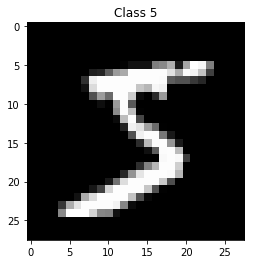

In [3]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

Now the shape of X_train is (60000, 28, 28, 1). As all the images are in grayscale, the number of channels is 1. If it was a color image, then the number of channels would be 3 (R, G, B).

Here we’ve rescaled the image data so that each pixel lies in the interval [0, 1] instead of [0, 255]. It is always a good idea to normalize the input so that each dimension has approximately the same scale.

Now, we need to one-hot encode the labels i.e. Y_train and Y_test. In one-hot encoding an integer is converted to an array which contains only one ‘1’ and the rest elements are ‘0’.

In [5]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

Keras allows us to specify the number of filters we want and the size of the filters. So, in our first layer, 32 is number of filters and (3, 3) is the size of the filter. We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.

#### The second layer is the Activation Layer
We have used ReLU (rectified linear unit) as our activation function. ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values in the matrix ‘x’ to 0 and keeps all the other values constant. It is the most used activation function since it reduces training time and prevents the problem of vanishing gradients.

#### The third layer is the MaxPooling layer.
MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting. It also reduces the number of parameters to learn, reducing the training time.

#### It’s a best practice to always do BatchNormalization.
BatchNormalization normalizes the matrix after it is been through a convolution layer so that the scale of each dimension remains the same. It reduces the training time significantly.

After creating all the convolutional layers, we need to *flatten them, so that they can act as an input to the Dense layers.*

Dense layers are keras’s alias for *Fully connected layers.* These layers give the ability to classify the features learned by the CNN.

#### Dropout is the method used to reduce overfitting.
It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.

#### The second last layer is the Dense layer with 10 neurons.
The neurons in this layer should be equal to the number of classes we want to predict as this is the output layer.

#### The last layer is the Softmax Activation layer.
Softmax activation enables us to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

In [6]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________

#### The cross-entropy loss calculates the error rate between the predicted value and the original value.
The formula for calculating cross-entropy loss is given here. Categorical is used because there are 10 classes to predict from. If there were 2 classes, we would have used binary_crossentropy.

#### The Adam optimizer is an improvement over SGD(Stochastic Gradient Descent).
The optimizer is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight. This is how a neural network learns.

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

#### To reduce over-fitting, we use another technique known as Data Augmentation. 
Data augmentation rotates, shears, zooms, etc the image so that the model learns to generalize and not remember specific data. If the model overfits, it will perform very well on the images that it already knows but will fail if new images are given to it.

This is how we can do Data Augmentation in Keras. You can play with the values and check if it improves the accuracy of the model.

In [9]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

#### We have to create batches, so that we use less memory.   
Moreover, we can also train our model faster by creating batches. Here we are using batch of 64, so the model will take 64 images at a time and train on them.

In [10]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

### Let's train !

In [18]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 210s 224ms/step - loss: 0.0270 - acc: 0.9919 - val_loss: 0.0185 - val_acc: 0.9940
Epoch 2/5
937/937 [==============================] - 206s 220ms/step - loss: 0.0268 - acc: 0.9916 - val_loss: 0.0188 - val_acc: 0.9933
Epoch 3/5
937/937 [==============================] - 211s 225ms/step - loss: 0.0240 - acc: 0.9926 - val_loss: 0.0172 - val_acc: 0.9940
Epoch 4/5
937/937 [==============================] - 205s 219ms/step - loss: 0.0222 - acc: 0.9931 - val_loss: 0.0208 - val_acc: 0.9946
Epoch 5/5
937/937 [==============================] - 204s 218ms/step - loss: 0.0205 - acc: 0.9937 - val_loss: 0.0192 - val_acc: 0.9937


In [19]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 8s 759us/step

Test accuracy:  0.9938


In [20]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)